# (D) The Two-Body Problem

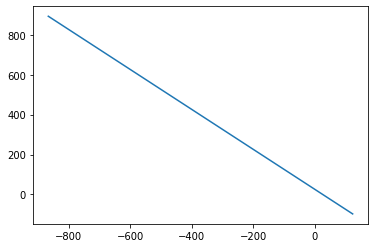

In [1]:
# This cell runs the file "Orbital_functions_n.ipynb" such that the functions in that file can be utillized here
%run ./Two_body_functionsOLD.ipynb

We want to solve the trajectories of two masses given their masses $m_1$ and $m_2$ and their initial conditions $(r_1,p_1)$ and $(r_2,p_2)$. It has been shown on many occasions that this problem reduces to a one-body problem of a reduced mass $\mu$ in a central potential in the center of mass frame. Thus, given the masses and initial conditions in the two-body fram we want to do the transformation

$$ \mathbf R = \frac{m_1 \mathbf r_1 + m_2 \mathbf r_2}{m_1 + m_2}, \qquad \mathbf V = \dot{\mathbf R} = \frac{m_1 \mathbf v_1 + m_2 \mathbf v_2}{m_1 + m_2}, \qquad \text{and} \qquad \mu = \frac{m_1 m_2}{m_1 + m_2}$$

Then calculate the orbitals, and then do the transformation back


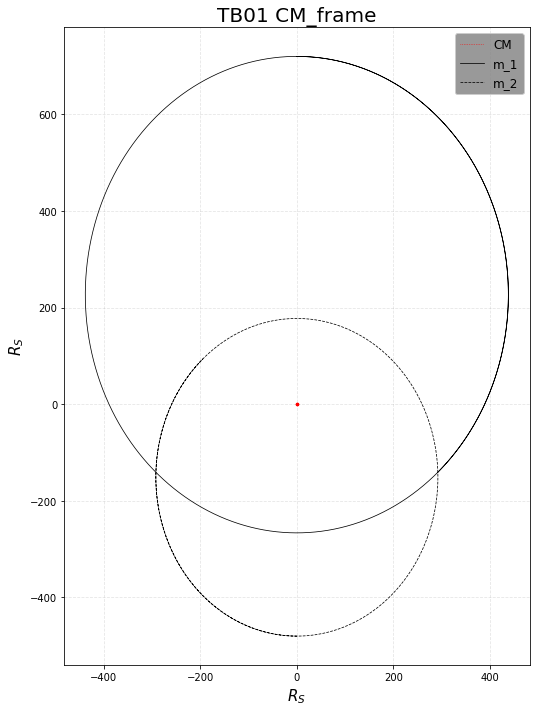

In [2]:
# Defining initial states in rest frame
m_1 = 10
x_1i = [0, 1000]
v_1i = [0.005, 0]
s_1 = x_1i[0], x_1i[1], v_1i[0], v_1i[1], m_1

m_2 = 15
x_2i = [0,-200]
v_2i = [-0.01, 0]
s_2 = x_2i[0], x_2i[1], v_2i[0], v_2i[1], m_2

# x_1, x_2, x_cm, rel_pos, ts = twoOrbitals(s_1, s_2)
# twoOrbPlotter(x_1, x_2, x_cm, save = False, filename='TB01 Rest_frame')

x_1, x_2, x_cm, rel_pos, ts = twoOrbitals(s_1, s_2, t_max = 300000)
twoOrbPlotter(x_1, x_2, x_cm, save= False, filename='TB01 CM_frame', CM = True)

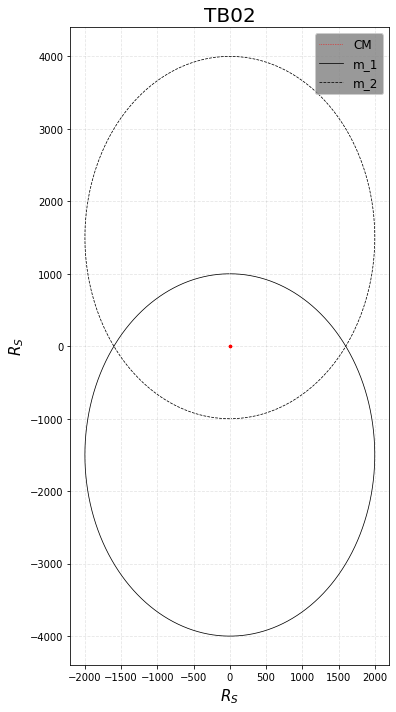

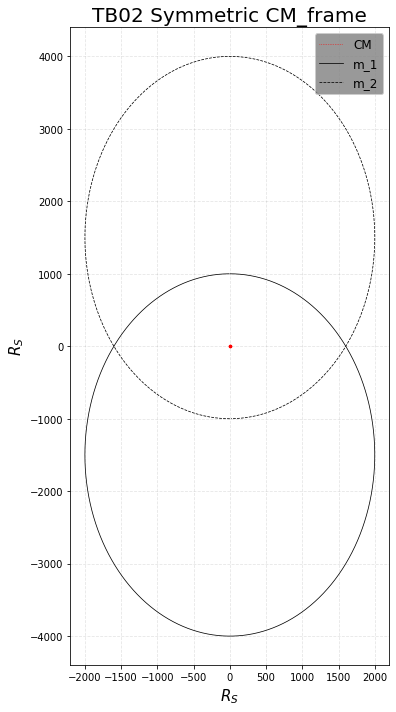

In [3]:
# Defining initial states in rest frame
m_1 = 10
x_1i = [0, 1000]
v_1i = [-0.01, 0]
s_1 = x_1i[0], x_1i[1], v_1i[0], v_1i[1], m_1

m_2 = 10
x_2i = [0,-1000]
v_2i = [0.01, 0]
s_2 = x_2i[0], x_2i[1], v_2i[0], v_2i[1], m_2


x_1, x_2, x_cm, rel_pos, ts = twoOrbitals(s_1, s_2, t_max = 3140000)
twoOrbPlotter(x_1, x_2, x_cm, save = False, filename='TB02')
twoOrbPlotter(x_1, x_2, x_cm, save = False, filename='TB02 Symmetric CM_frame', CM=True)

In [4]:
# x_1[0:1]

# ANIMATION

MovieWriter stderr:
./Animations/test.gif: No such file or directory



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '600x2400', '-pix_fmt', 'rgba', '-r', '24.390243902439025', '-loglevel', 'error', '-i', 'pipe:', '-filter_complex', 'split [a][b];[a] palettegen [p];[b][p] paletteuse', '-y', './Animations/test.gif']' returned non-zero exit status 1.

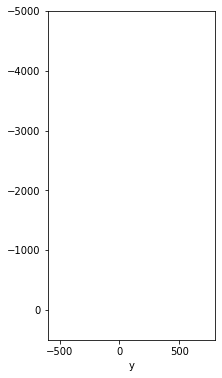

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation

# # xdata = []
# # ydata = []

# fig = plt.figure(figsize=(3,12))
# ax = plt.subplot(1, 1, 1)
# ax.set_aspect('0.5')


# # def animation_frame(i):
# #     xdata.append(x_1[0][i*200])
# #     ydata.append(x_1[1][i*200])
# #     line.set_xdata(xdata)
# #     line.set_ydata(ydata)
# #     return line,

# data_skip = (int(len(x_1[0])/480))

# def init_func():
#     ax.clear()
#     plt.xlabel('x')
#     plt.xlabel('y')
#     plt.ylim((500,-5000))
#     plt.xlim((-600,800))

# def update_plot(i):
#     ax.plot(x_1[1][i:i+data_skip],x_1[0][i:i+data_skip],'k',lw=0.75)
#     ax.plot(x_2[1][i:i+data_skip],x_2[0][i:i+data_skip],'b',lw=0.75)
#     ax.plot(x_cm[1][i:i+data_skip],x_cm[0][i:i+data_skip],'r',lw=0.5)
#     return ax,

# animation = FuncAnimation(fig, update_plot, frames=range(0, len(x_1[0]), data_skip), init_func=init_func, interval = 41, blit=False)
# animation.save('./Animations/test.gif', dpi=200, writer='ffmpeg')
# plt.close()

# EINSTEIN, INFELD and HOFMANN
With $\mathbf r = \mathbf r_1 - \mathbf r_2$ and $r = \sqrt{\mathbf r \cdot \mathbf r}$ and $\dot{\mathbf x}_{i_\perp} = \dot{\mathbf x}_i - \mathbf r (\dot{\mathbf x}_i \cdot \mathbf r)/r^2$, the Newton and the Einstein-Infeld-Hofmann lagrangians for the two-body problem are

$$ \mathcal{L}_\mathrm{N} = \frac 1 2 \sum_{i=1}^2 m_i \dot {\mathbf x}_i^2 - \frac{G m_1 m_2}{r}$$

$$ \mathcal{L}_\mathrm{EIH} = \mathcal L_\mathrm{N} + \frac 1 8 \sum_{i=1}^2 m_i \dot{\mathbf x}_i^4 + \frac{G m_1 m_2}{2 r } \left[3 (\dot {\mathbf x}_1^2 + \dot {\mathbf x_2}^2) - 8 \dot {\mathbf x}_1 \cdot \dot {\mathbf x}_2 + \dot{\mathbf x}_{1_\perp} \cdot \dot{\mathbf x}_{2_\perp}\right] - \frac{G^2 m_1 m_2 (m_1 + m_2)}{2 r^2}$$

$$\mathcal{L}_\mathrm{EIH} = \frac 1 2 \sum_{i=1}^2 m_i \dot {\mathbf x}_i^2 - \frac{G m_1 m_2}{r} + \frac 1 8 \sum_{i=1}^2 m_i \dot{\mathbf x}_i^4 + \frac{G m_1 m_2}{2 r } \left[3 (\dot {\mathbf x}_1^2 + \dot {\mathbf x_2}^2) - 8 \dot {\mathbf x}_1 \cdot \dot {\mathbf x}_2 + \dot{\mathbf x}_{1_\perp} \cdot \dot{\mathbf x}_{2_\perp}\right] - \frac{G^2 m_1 m_2 (m_1 + m_2)}{2 r^2}$$